# Work Analysis in the Data Science Area

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import display


##### Import DataSet

In [2]:
ds = pd.read_csv("data_cleaned_2021.csv")

##### Creating and changing City, State and Annual Average Salary columns

In [3]:
# Extract the numerical values from the "Salary Estimate" column and calculate the average
ds['Salary_Mean'] = ds['Salary Estimate'].str.extract('(\d+)').astype(float).mean(axis=1)

# Round the mean and convert to integer
ds['Salary_Mean'] = ds['Salary_Mean'].round().astype(int)

#Changing the whole number to thousands
ds['Salary_Mean'] = ds['Salary_Mean'] * 1000


In [4]:
# Calls the 'State' and 'City' column from the 'Location' column
ds[['City', 'State']] = ds['Location'].str.extract(r'(?P<City>.*), (?P<State>.*)')

In [47]:
ds.head(4)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,Salary_Mean,City,State
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,1,0,0,0,data scientist,na,M,53000,Albuquerque,NM
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,data scientist,na,M,63000,Linthicum,MD
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,data scientist,na,M,80000,Clearwater,FL
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,data scientist,na,na,56000,Richland,WA


In [57]:
Jobs = ds['job_title_sim'].value_counts()
print(Jobs)

job_title_sim
data scientist                    313
other scientist                   143
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
na                                 10
data analitics                      8
data modeler                        5
director                            5
Name: count, dtype: int64


#### 1: Salary Histogram
Calculation of salary frequency per job offer

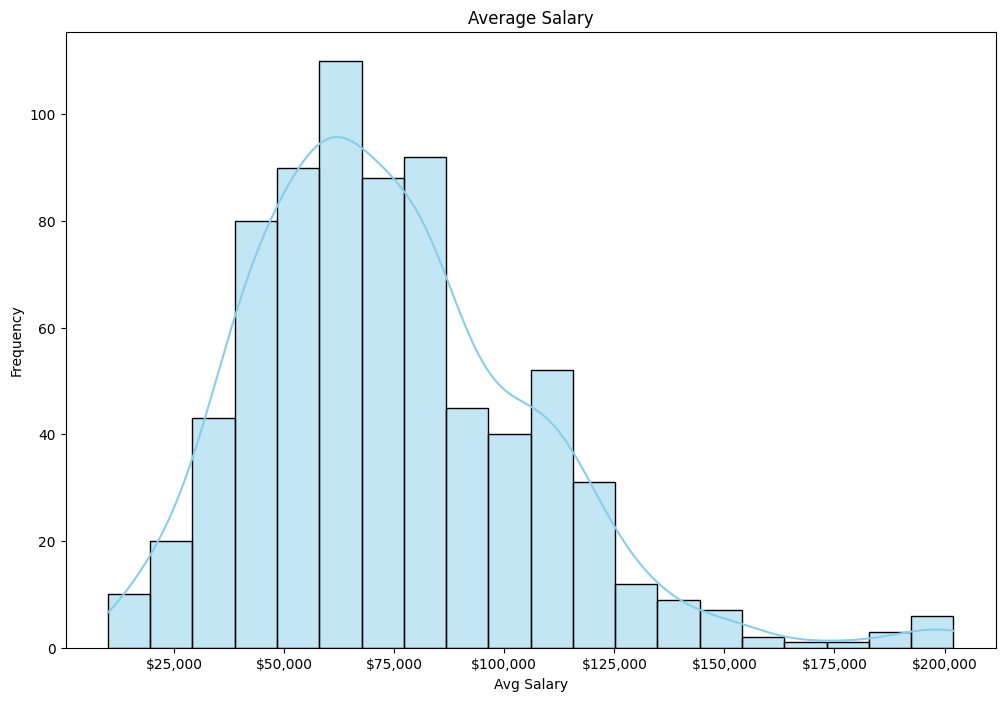

In [36]:
Salaries = ds['Salary_Mean'].dropna()

def format_salary(value, _):
    return '${:,.0f}'.format(value)

plt.figure(figsize=(12,8))
sns.histplot(Salaries, bins=20, kde=True, color='skyblue')

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_salary))

plt.title('Average Salary')
plt.xlabel('Avg Salary')
plt.ylabel('Frequency')
plt.show()

#### 2: Boxplot of Salaries by State
Analyzing Salaries by States, viewing Outliers and average salaries.

<function matplotlib.pyplot.show(close=None, block=None)>

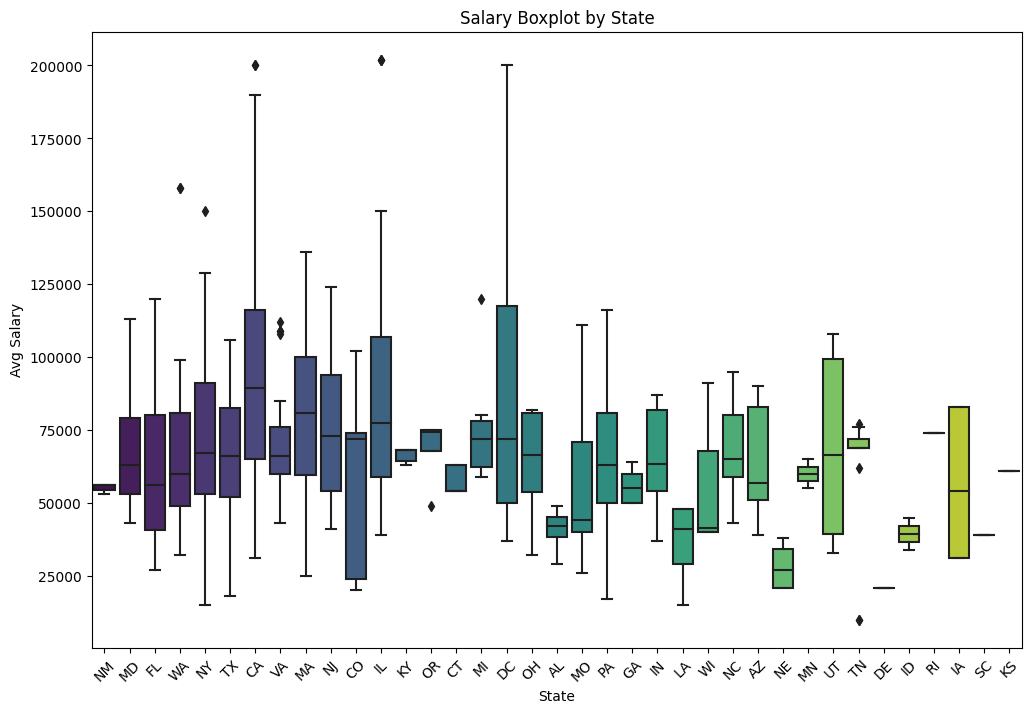

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(x='State', y='Salary_Mean', data=ds, palette='viridis')
plt.title('Salary Boxplot by State')
plt.xlabel('State')
plt.ylabel('Avg Salary')
plt.xticks(rotation=45)
plt.show

#### 3: Job Count by Company

Text(0, 0.5, 'Companies')

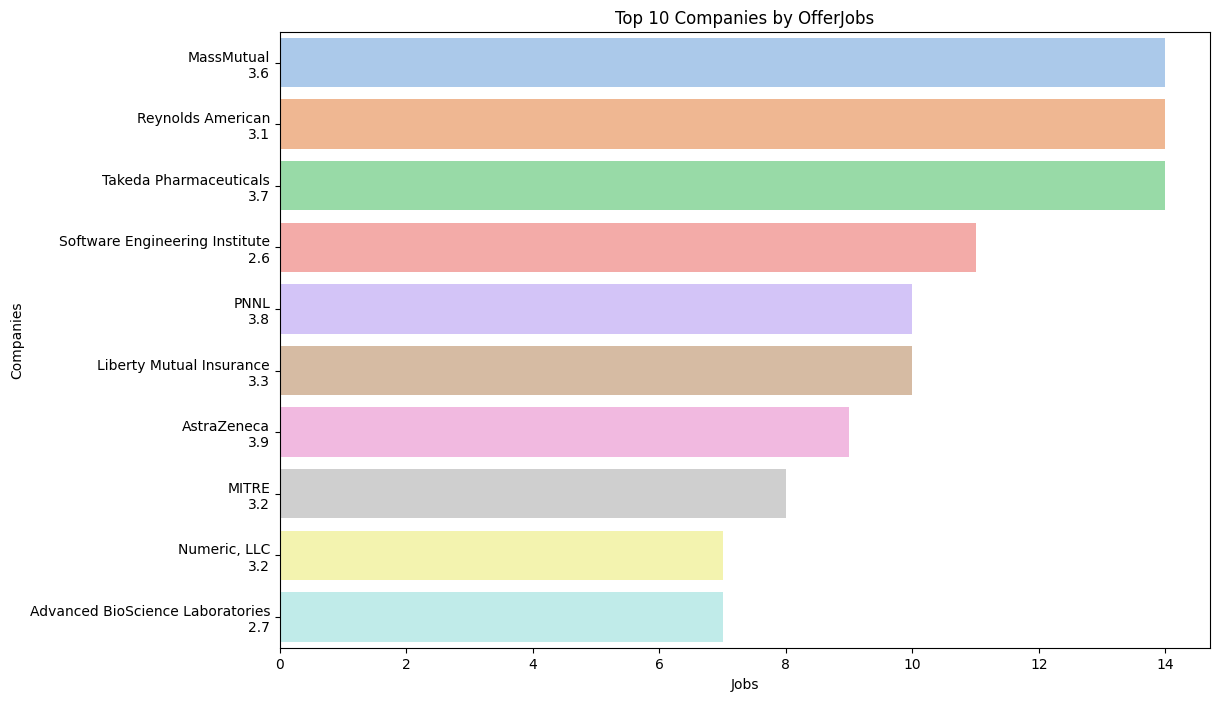

In [24]:
plt.figure(figsize=(12,8))
company_counts = ds['Company Name'].value_counts().head(10)
sns.barplot(x=company_counts, y=company_counts.index, palette='pastel')
plt.title('Top 10 Companies by OfferJobs')
plt.xlabel('Jobs')
plt.ylabel('Companies')

#### 4: Top Rated Companies Chart

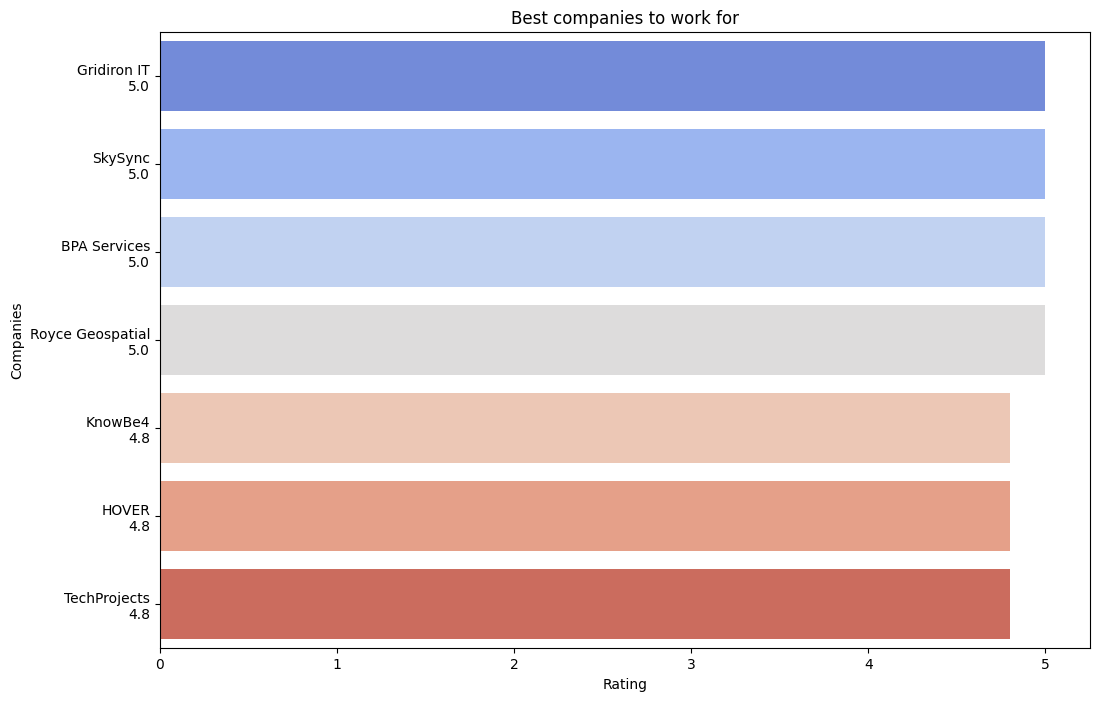

In [32]:
top_companioes = ds[ds['Rating'] >= 4.5].sort_values('Rating', ascending=False).head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='Rating', y='Company Name', data=top_companioes, palette='coolwarm')
plt.title('Best companies to work for')
plt.xlabel('Rating')
plt.ylabel('Companies')
plt.show()

#### 5: Scatterplot between Salary and Appraisal

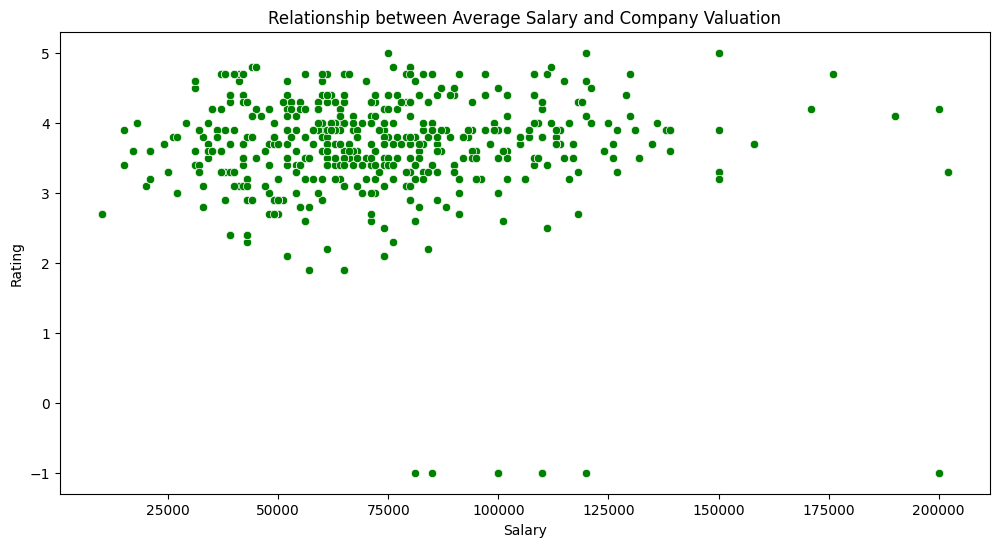

In [43]:

salary_rating_data = ds[['Salary_Mean', 'Rating']].dropna()


plt.figure(figsize=(12, 6))
sns.scatterplot(x='Salary_Mean', y='Rating', data=salary_rating_data, color='green')
plt.title('Relationship between Average Salary and Company Valuation')
plt.xlabel('Salary')
plt.ylabel('Rating')
plt.show()

#### 5: Salary Chart by Position

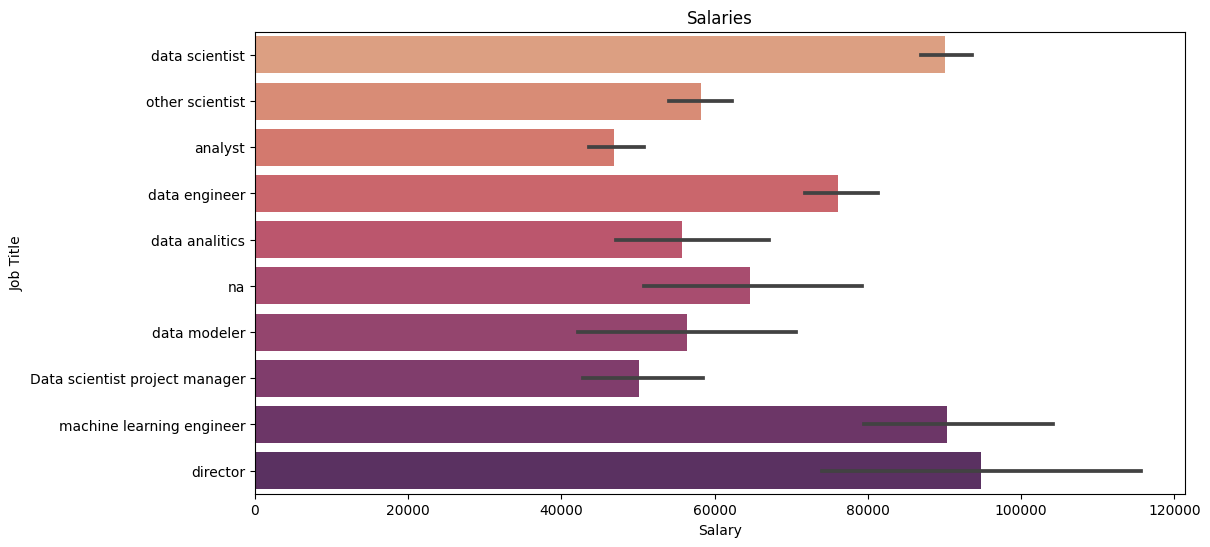

In [56]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Salary_Mean', y='job_title_sim', data=ds, palette='flare')
plt.title('Salaries')
plt.xlabel('Salary')
plt.ylabel('Job Title')
plt.show()